## Preprocessing

In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [25]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
# Determine the number of unique values in each column.
app_values= application_df.dtypes.index.tolist()
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts= application_df["APPLICATION_TYPE"].value_counts()
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [31]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= list(app_counts[app_counts < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [32]:
# Look at CLASSIFICATION value counts for binning
class_bin= application_df["CLASSIFICATION"].value_counts()
class_bin.head(20)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: count, dtype: int64

In [33]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_bin_gt1 = application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() > 1]
print(class_bin_gt1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [34]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace= list(class_bin[class_bin < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [36]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical= pd.get_dummies(application_df)
categorical

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [37]:
# Split our preprocessed data into our features and target arrays
X= categorical.drop(columns=["IS_SUCCESSFUL"])
Y= categorical["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_trainer, X_test, Y_trainer, Y_test = train_test_split(X, Y, random_state=78)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_trainer)

# Scale the data
X_train_scaled = X_scaler.transform(X_trainer)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_feature_number= len(X_train_scaled[0])
hidden_nodes_layer_one= 10
hidden_nodes_layer_two= 20
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_one, activation="relu", input_dim=input_feature_number))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_two, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                440       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 681 (2.66 KB)
Trainable params: 681 (2.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model
#Please be patient, the model needs time to process 50 epochs!
bot_trained= nn.fit(X_train_scaled, Y_trainer, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6012 - accuracy: 0.6873
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.7281
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7292
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7307
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7313
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7316
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7328
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7320
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7313
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7323

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5499 - accuracy: 0.7277 - 341ms/epoch - 1ms/step
Loss: 0.5498801469802856, Accuracy: 0.7276967763900757


<AxesSubplot:>

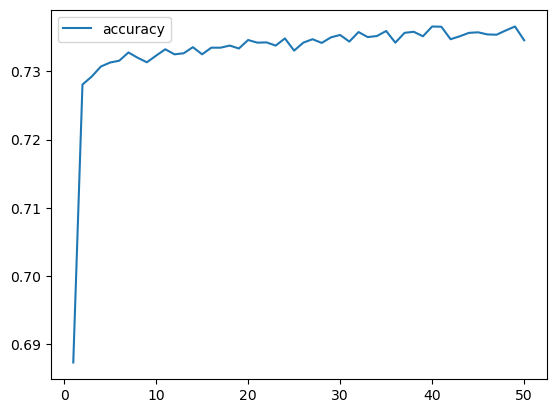

In [48]:
#Plotting accuracy for report
import numpy as np
graph_one = pd.DataFrame(bot_trained.history, index = range(1, len(bot_trained.history['loss'])+1))
graph_one.plot(y = 'accuracy')

In [49]:
#Attempt 2 since I didn't get 75% accuracy. I'm adding a 3rd hidden layer
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_feature_number= len(X_train_scaled[0])
hidden_nodes_layer_one= 10
hidden_nodes_layer_two= 20
hidden_nodes_layer_three= 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_one, activation="relu", input_dim=input_feature_number))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_two, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_three, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                440       
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dense_8 (Dense)             (None, 30)                630       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Train the model
#Please be patient, the model needs time to process 50 epochs!
model_two= nn.fit(X_train_scaled, Y_trainer, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5822 - accuracy: 0.7140
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7301
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7317
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7317
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5519 - accuracy: 0.7305
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7321
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7325
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7331
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7330
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7342

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5518 - accuracy: 0.7270 - 347ms/epoch - 1ms/step
Loss: 0.5517781376838684, Accuracy: 0.7269970774650574


<AxesSubplot:>

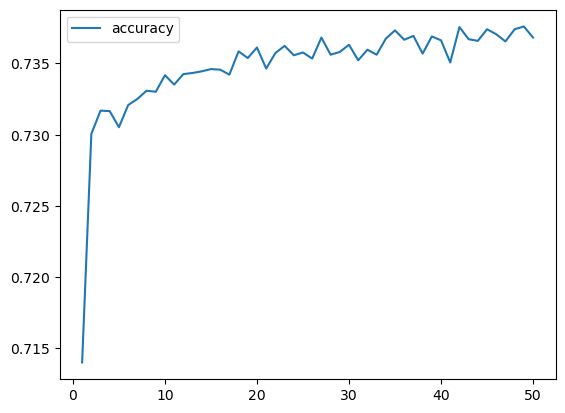

In [55]:
#Plotting accuracy for report
graph_two = pd.DataFrame(model_two.history, index = range(1, len(model_two.history['loss'])+1))
graph_two.plot(y = 'accuracy')

In [60]:
#3rd attempt since still haven't achieved 75%. I'm going to alter the activation functions and hidden nodes
# to see what happens...
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_feature_number= len(X_train_scaled[0])
hidden_nodes_layer_one= 9
hidden_nodes_layer_two= 22
hidden_nodes_layer_three= 34
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_one, activation="relu", input_dim=input_feature_number))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_two, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_three, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 9)                 396       
                                                                 
 dense_15 (Dense)            (None, 22)                220       
                                                                 
 dense_16 (Dense)            (None, 34)                782       
                                                                 
 dense_17 (Dense)            (None, 1)                 35        
                                                                 
Total params: 1433 (5.60 KB)
Trainable params: 1433 (5.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Train the model
#Please be patient, the model needs time to process 50 epochs!
model_three= nn.fit(X_train_scaled, Y_trainer, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5889 - accuracy: 0.7094
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5609 - accuracy: 0.7267
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.7291
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7295
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7297
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7292
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7298
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7325
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7306
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7292

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5527 - accuracy: 0.7251 - 346ms/epoch - 1ms/step
Loss: 0.552685022354126, Accuracy: 0.7251312136650085


<AxesSubplot:>

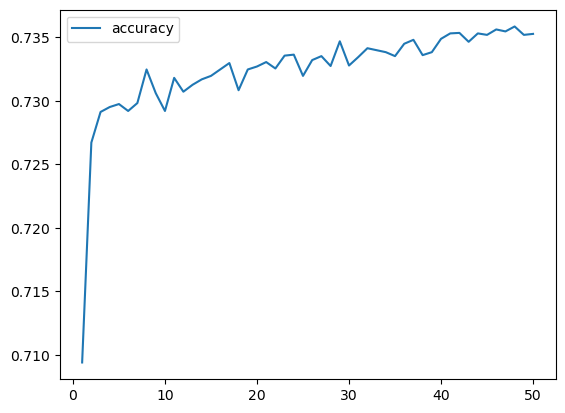

In [66]:
#Plotting accuracy for report
graph_three = pd.DataFrame(model_three.history, index = range(1, len(model_two.history['loss'])+1))
graph_three.plot(y = 'accuracy')

In [67]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/Users/juliencounts/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
